## Recorded Data Analysis

In [22]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from srl_il.dataset.dataset_no_segment import DatasetNoSegment, dataset_no_segment

In [134]:
direc = "data/data_12_12_2024/"
blue_big_data = "data/data_12_12_2024/blue_big_12and13dez_processed_20hz"
red_big_data = "data/data_12_12_2024/red_big_12and13dez_processed_20hz"
yellow_big_data = "data/data_12_12_2024/yellow_12and13dez_big_processed_20hz"

In [135]:
td = DatasetNoSegment(direc)
td_blue_big = DatasetNoSegment(blue_big_data)
td_red_big = DatasetNoSegment(red_big_data)
td_yellow_big = DatasetNoSegment(yellow_big_data)

/home/ubuntu/biomimic/srl_il
Found 130 H5 files
H5 File /home/ubuntu/biomimic/srl_il/data/data_12_12_2024/blue_big_12and13dez_processed_20hz/0037.h5
H5 File /home/ubuntu/biomimic/srl_il/data/data_12_12_2024/blue_big_12and13dez_processed_20hz/0004.h5
H5 File /home/ubuntu/biomimic/srl_il/data/data_12_12_2024/blue_big_12and13dez_processed_20hz/0009.h5
H5 File /home/ubuntu/biomimic/srl_il/data/data_12_12_2024/blue_big_12and13dez_processed_20hz/0027.h5
H5 File /home/ubuntu/biomimic/srl_il/data/data_12_12_2024/blue_big_12and13dez_processed_20hz/0007.h5
File /home/ubuntu/biomimic/srl_il/data/data_12_12_2024/blue_big_12and13dez_processed_20hz/0007.h5 may be corrupted. Unable to synchronously open file (truncated file: eof = 144703488, sblock->base_addr = 0, stored_eof = 191302528)
H5 File /home/ubuntu/biomimic/srl_il/data/data_12_12_2024/blue_big_12and13dez_processed_20hz/0000.h5
H5 File /home/ubuntu/biomimic/srl_il/data/data_12_12_2024/blue_big_12and13dez_processed_20hz/0031.h5
H5 File /home/

## 1. Understanding Trajectory Data:
1. How close are the starting points for each of the datapoints in both the Franka QPOS, and the hand QPOS?
2. How varied are they in terms of an arbitrary state space exploration? Can this be plotted in some sort of a graph?

## 2. Understanding Sensor Data:
1. How reliably are each of the episodes showing the sensor data flaring up at least once in the episode? (Assuming that we actually grasped the object)?

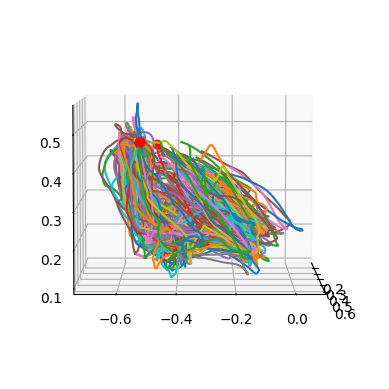

In [31]:
# 1.1 Understanding the starting and endpoints of the trajectoties

# Plotting the end effector trajectories in a 3d graph:

# Plot one:
td.traj_data['qpos_franka'][0].shape

franka_traj = td.traj_data['qpos_franka'][0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=5, azim=0)

def plot_franka_traj(ax, franka_traj):

    positions = franka_traj[:, :3]
    quaternions = franka_traj[:, 3:]
    ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], label="Trajectory")
    ax.plot(positions[0, 0], positions[0, 1], positions[0, 2], color="red", marker='o')
    # ax.plot(positions[-1, 0], positions[-1, 1], positions[-1, 2], color="green", marker='o')

for t in td.traj_data['qpos_franka']:
    plot_franka_traj(ax, t)

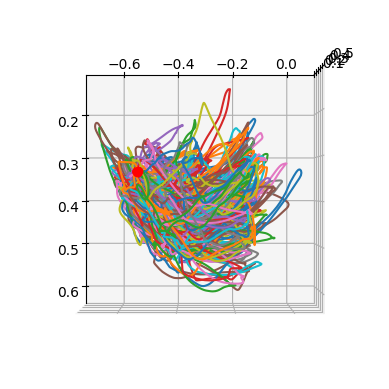

In [123]:
# Top down view
franka_traj = td.traj_data['qpos_franka'][0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=90, azim=0)

for t in td.traj_data['qpos_franka']:
    plot_franka_traj(ax, t)

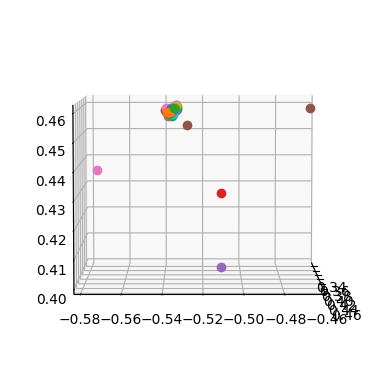

In [108]:
# Plot start positions:
fig = plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.view_init(elev=5, azim=0)

for t in td.traj_data['qpos_franka']:
    positions = t[:, :3]
    quaternions = t[:, 3:]
    ax.plot(positions[0, 0], positions[0, 1], positions[0, 2],  marker='o', label="Trajectory")



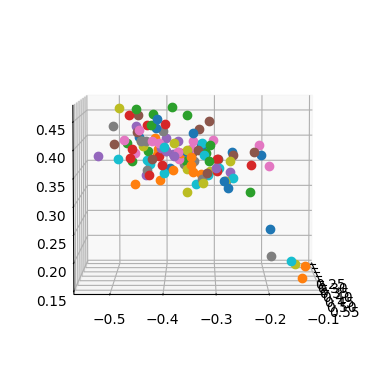

In [33]:
# Plot end positions:
fig = plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.view_init(elev=5, azim=0)

for t in td.traj_data['qpos_franka']:
    positions = t[:, :3]
    quaternions = t[:, 3:]
    ax.plot(positions[-1, 0], positions[-1, 1], positions[-1, 2],  marker='o', label="Trajectory")

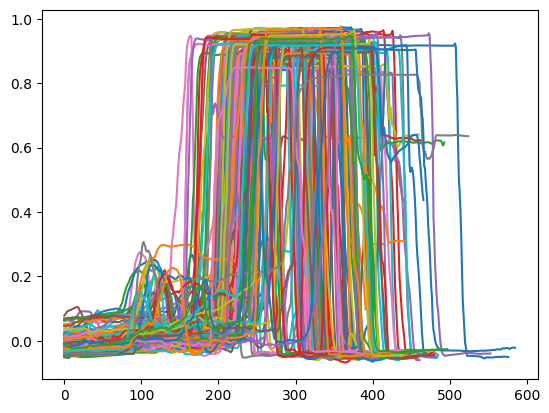

In [47]:
# Plotting hand trajectories
fig = plt.figure()
ax=fig.add_subplot(111)

def plot_hand_traj(ax, hand_traj):
    ax.plot(np.linalg.norm(hand_traj[:, :], ord=1, axis=1), label="Trajectory")


# plot_hand_traj(ax, td.traj_data['qpos_hand'][0])
for t in td.traj_data['qpos_hand']:

    plot_hand_traj(ax, t)

In [141]:
def add_noise(stddev, mean, data):
    noise = np.random.randn(*data.shape)
    return data + noise * stddev + mean

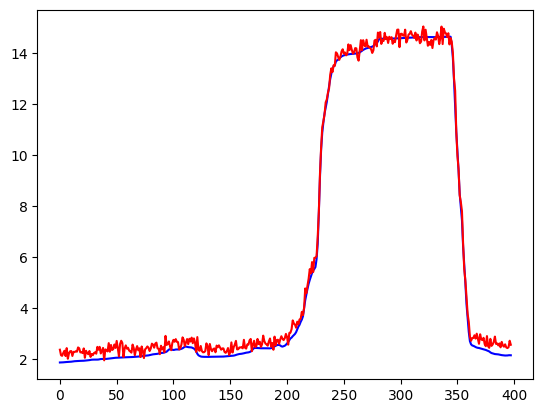

In [142]:
# Adding noise to the hand pos:
stddev = 0.05
mean = 0

hand_traj = td.traj_data['qpos_hand'][0]
noisy_traj = add_noise(stddev, mean, hand_traj)

fig = plt.figure()
ax=fig.add_subplot(111)

ax.plot(np.linalg.norm(hand_traj, ord=1, axis=1), color="blue")
ax.plot(np.linalg.norm(noisy_traj, ord=1, axis=1), color="red")


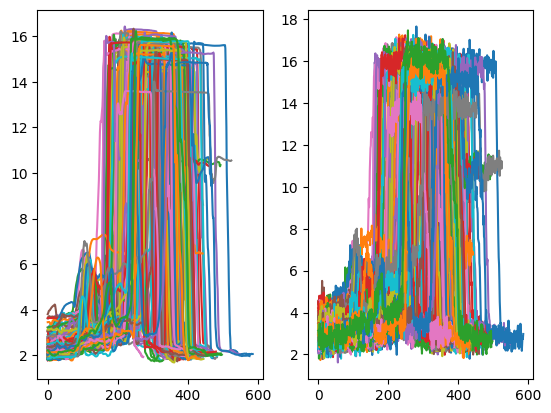

In [67]:
# Plot all noisy.
fig = plt.figure()
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

stddev = 0.1
mean = 0

def plot_noisy(ax1, ax2, hand_traj):
    noise = np.random.randn(*hand_traj.shape)
    noisy_traj = hand_traj + noise * stddev + mean
    
    ax1.plot(np.linalg.norm(hand_traj, ord=1, axis=1))
    ax2.plot(np.linalg.norm(noisy_traj, ord=1, axis=1))

for t in td.traj_data['qpos_hand']:
    plot_noisy(ax1, ax2, t)

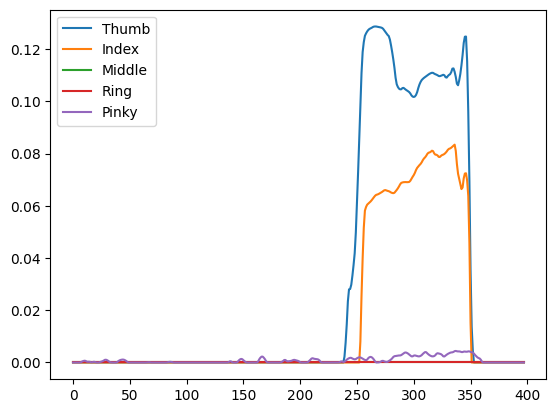

In [73]:
# Sensor Data
fig = plt.figure()
ax=fig.add_subplot(111)

dThumb = td.traj_data["thumb_sensor_filtered"][0]
dIndex = td.traj_data["index_sensor_filtered"][0]
dMiddle = td.traj_data["middle_sensor_filtered"][0]
dRing = td.traj_data["ring_sensor_filtered"][0]
dPinky = td.traj_data["pinky_sensor_filtered"][0]

ax.plot(dThumb, label="Thumb")
ax.plot(dIndex, label="Index")
ax.plot(dMiddle, label="Middle")
ax.plot(dRing, label="Ring")
ax.plot(dPinky, label="Pinky")
ax.legend()

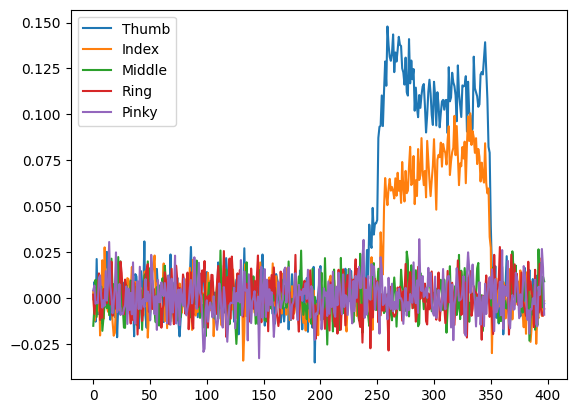

In [144]:
# Sensor Data With Noise
fig = plt.figure()
ax=fig.add_subplot(111)

dThumb = td.traj_data["thumb_sensor_filtered"][0]
dIndex = td.traj_data["index_sensor_filtered"][0]
dMiddle = td.traj_data["middle_sensor_filtered"][0]
dRing = td.traj_data["ring_sensor_filtered"][0]
dPinky = td.traj_data["pinky_sensor_filtered"][0]
stddev = 0.01
mean = 0

ax.plot(add_noise(stddev, mean, dThumb), label="Thumb")
ax.plot(add_noise(stddev, mean, dIndex), label="Index")
ax.plot(add_noise(stddev, mean, dMiddle), label="Middle")
ax.plot(add_noise(stddev, mean, dRing), label="Ring")
ax.plot(add_noise(stddev, mean, dPinky), label="Pinky")
ax.legend()

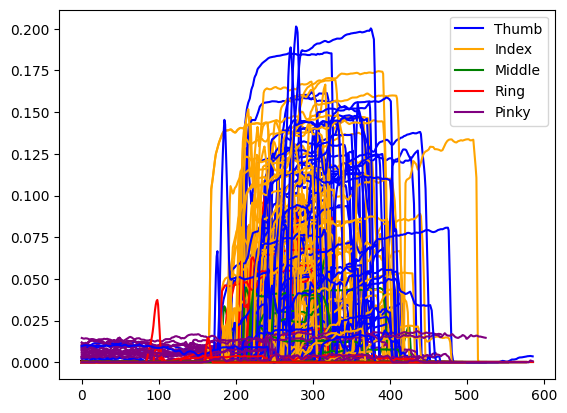

In [76]:
# Across all recorded data, which sensors are we most likely firing up?
fig = plt.figure()
ax=fig.add_subplot(111)

dThumb = td.traj_data["thumb_sensor_filtered"]
dIndex = td.traj_data["index_sensor_filtered"]
dMiddle = td.traj_data["middle_sensor_filtered"]
dRing = td.traj_data["ring_sensor_filtered"]
dPinky = td.traj_data["pinky_sensor_filtered"]

used_label = False

for t, i, m, r, p in zip(dThumb, dIndex, dMiddle, dRing, dPinky):
    if not used_label:
        ax.plot(t, color="blue", label="Thumb")
        ax.plot(i, color="orange", label="Index")
        ax.plot(m, color="green", label="Middle")
        ax.plot(r, color="red", label="Ring")
        ax.plot(p, color="purple", label="Pinky")
        used_label = True
    ax.plot(t, color="blue")
    ax.plot(i, color="orange")
    ax.plot(m, color="green")
    ax.plot(r, color="red")
    ax.plot(p, color="purple")

ax.legend()

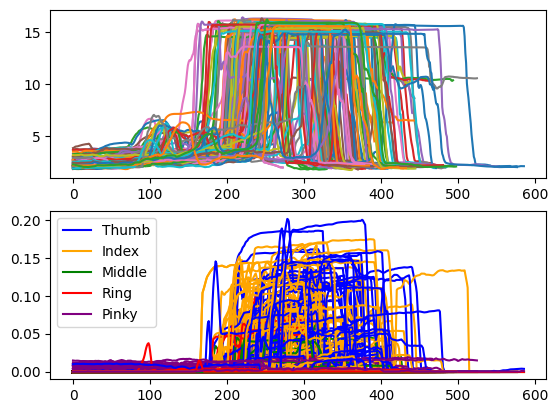

In [78]:
# Plot sensor and grasp data toegteher
fig = plt.figure()
ax1=fig.add_subplot(211)

def plot_hand_traj(ax, hand_traj):
    ax1.plot(np.linalg.norm(hand_traj[:, :], ord=1, axis=1), label="Trajectory")


# plot_hand_traj(ax, td.traj_data['qpos_hand'][0])
for t in td.traj_data['qpos_hand']:

    plot_hand_traj(ax1, t)

ax=fig.add_subplot(212)

dThumb = td.traj_data["thumb_sensor_filtered"]
dIndex = td.traj_data["index_sensor_filtered"]
dMiddle = td.traj_data["middle_sensor_filtered"]
dRing = td.traj_data["ring_sensor_filtered"]
dPinky = td.traj_data["pinky_sensor_filtered"]

used_label = False

for t, i, m, r, p in zip(dThumb, dIndex, dMiddle, dRing, dPinky):
    if not used_label:
        ax.plot(t, color="blue", label="Thumb")
        ax.plot(i, color="orange", label="Index")
        ax.plot(m, color="green", label="Middle")
        ax.plot(r, color="red", label="Ring")
        ax.plot(p, color="purple", label="Pinky")
        used_label = True
    ax.plot(t, color="blue")
    ax.plot(i, color="orange")
    ax.plot(m, color="green")
    ax.plot(r, color="red")
    ax.plot(p, color="purple")

ax.legend()

/tmp/ipykernel_9790/408216400.py:14: RuntimeWarning: invalid value encountered in divide
  return d / np.max(d)


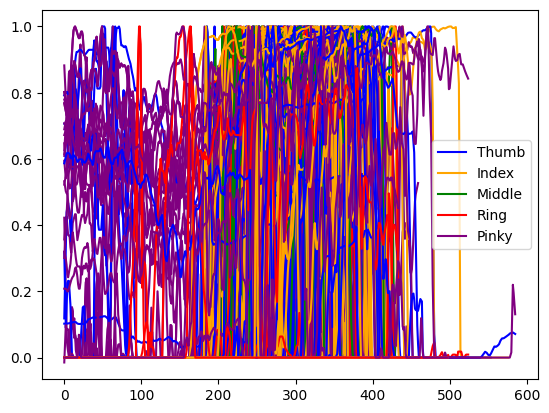

In [84]:
# Plotting all sensor data, but normalized between 0 and 1
fig = plt.figure()
ax=fig.add_subplot(111)

dThumb = td.traj_data["thumb_sensor_filtered"]
dIndex = td.traj_data["index_sensor_filtered"]
dMiddle = td.traj_data["middle_sensor_filtered"]
dRing = td.traj_data["ring_sensor_filtered"]
dPinky = td.traj_data["pinky_sensor_filtered"]

used_label = False

def normalize_data(d):
    return d / np.max(d)


for t, i, m, r, p in zip(dThumb, dIndex, dMiddle, dRing, dPinky):

    t = normalize_data(t)
    i = normalize_data(i)
    m = normalize_data(m)
    r = normalize_data(r)
    p = normalize_data(p)
    if not used_label:
        ax.plot(t, color="blue", label="Thumb")
        ax.plot(i, color="orange", label="Index")
        ax.plot(m, color="green", label="Middle")
        ax.plot(r, color="red", label="Ring")
        ax.plot(p, color="purple", label="Pinky")
        used_label = True
    ax.plot(t, color="blue")
    ax.plot(i, color="orange")
    ax.plot(m, color="green")
    ax.plot(r, color="red")
    ax.plot(p, color="purple")

ax.legend()

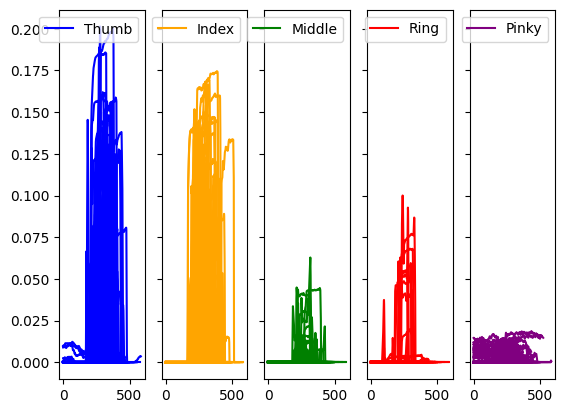

In [90]:
# Plot sensor data in separate plots for each figure
fig, ax = plt.subplots(1, 5, sharey=True)

dThumb = td.traj_data["thumb_sensor_filtered"]
dIndex = td.traj_data["index_sensor_filtered"]
dMiddle = td.traj_data["middle_sensor_filtered"]
dRing = td.traj_data["ring_sensor_filtered"]
dPinky = td.traj_data["pinky_sensor_filtered"]

used_label = False

for t, i, m, r, p in zip(dThumb, dIndex, dMiddle, dRing, dPinky):
    if not used_label:
        ax[0].plot(t, color="blue", label="Thumb")
        ax[1].plot(i, color="orange", label="Index")
        ax[2].plot(m, color="green", label="Middle")
        ax[3].plot(r, color="red", label="Ring")
        ax[4].plot(p, color="purple", label="Pinky")
        used_label = True
    ax[0].plot(t, color="blue")
    ax[1].plot(i, color="orange")
    ax[2].plot(m, color="green")
    ax[3].plot(r, color="red")
    ax[4].plot(p, color="purple")

for a in ax:
    a.legend()

In [80]:
normalize_data(td.traj_data["thumb_sensor_filtered"][0])

## Understand where we place the cube in most times, 
Idea: Take the gradient of the grasp timesteps to figure out roughly when we're performing the grasp. For those timesteps, understand where the franka is.
Do the same for the drop off.



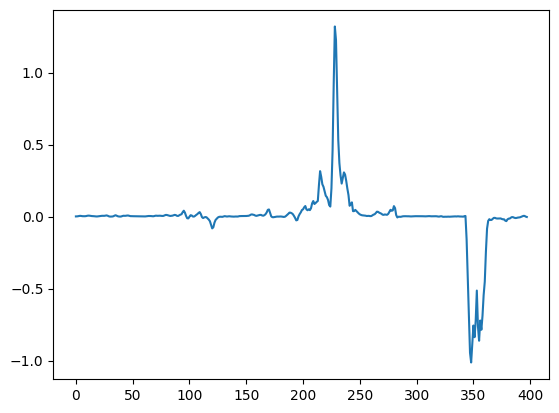

In [96]:
# Plot gradients to find some threshold
plt.plot(np.gradient(np.linalg.norm(td.traj_data["qpos_hand"][0], axis=1, ord=1)))

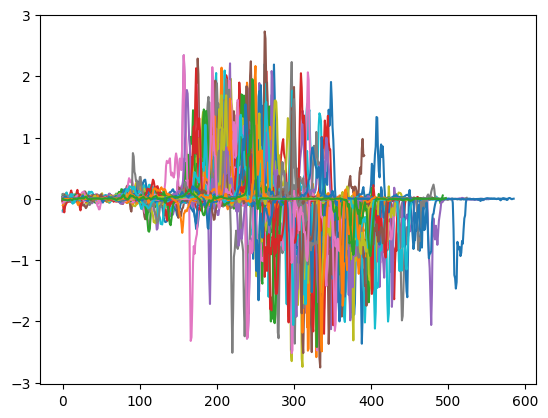

In [95]:
# Plot all gradients to find some threshold
for t in td.traj_data["qpos_hand"]:
    plt.plot(np.gradient(np.linalg.norm(t, axis=1, ord=1)))

Looks like we should use the argmax and argmin for each trajectory

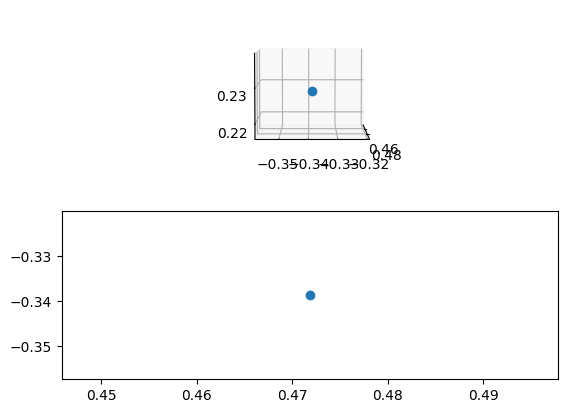

In [104]:
grad = np.gradient(np.linalg.norm(td.traj_data["qpos_hand"][0], axis=1, ord=1))
max_time = np.argmax(grad)
min_time = np.argmin(grad)

fig = plt.figure()
ax1 = fig.add_subplot(211, projection='3d')
ax1.view_init(elev=5, azim=0)
ax2 = fig.add_subplot(212)

all_pos = td.traj_data["qpos_franka"][0][:, :3]
grasp_pos = all_pos[max_time, :]
release_pos = all_pos[min_time, :]
ax1.plot(grasp_pos[0], grasp_pos[1], grasp_pos[2], marker='o',)
ax2.plot(grasp_pos[0], grasp_pos[1], marker='o',)

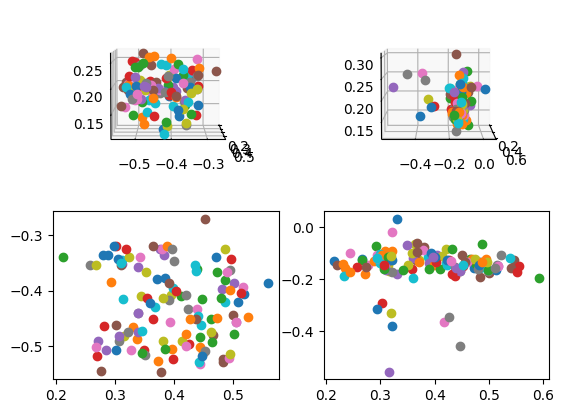

In [106]:
# Do the same for all:
fig = plt.figure()
ax1 = fig.add_subplot(221, projection='3d')
ax1.view_init(elev=5, azim=0)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(222, projection='3d')
ax3.view_init(elev=5, azim=0)
ax4 = fig.add_subplot(224)

def plot_grasp_loc(ax1, ax2, ax3, ax4, hand_traj, franka_traj):
    grad = np.gradient(np.linalg.norm(hand_traj, axis=1, ord=1))
    max_time = np.argmax(grad)
    min_time = np.argmin(grad)
    
    all_pos = franka_traj[:, :3]
    grasp_pos = all_pos[max_time, :]
    release_pos = all_pos[min_time, :]
    ax1.plot(grasp_pos[0], grasp_pos[1], grasp_pos[2], marker='o')
    ax2.plot(grasp_pos[0], grasp_pos[1], marker='o')
    ax3.plot(release_pos[0], release_pos[1], release_pos[2], marker='o')
    ax4.plot(release_pos[0], release_pos[1], marker='o')

for h, f in zip(td.traj_data["qpos_hand"], td.traj_data["qpos_franka"]):
    plot_grasp_loc(ax1, ax2, ax3, ax4, h, f)

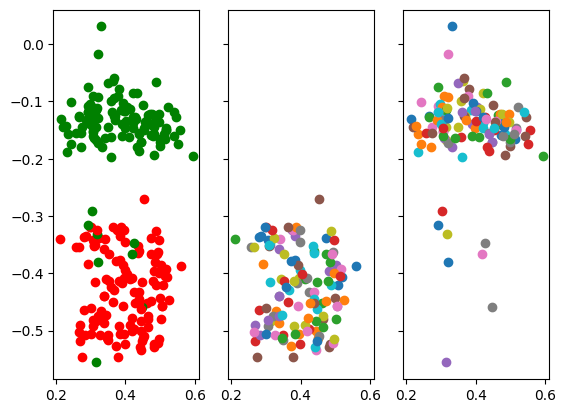

In [132]:
# Do the same for all 2D with shared x and y
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
ax0 = axs[0]
ax1 = axs[1]
ax2 = axs[2]

def plot_grasp_loc_2d(ax0, ax1, ax2, hand_traj, franka_traj):
    grad = np.gradient(np.linalg.norm(hand_traj, axis=1, ord=1))
    max_time = np.argmax(grad)
    min_time = np.argmin(grad)
    
    all_pos = franka_traj[:, :3]
    grasp_pos = all_pos[max_time, :]
    release_pos = all_pos[min_time, :]
    ax0.plot(grasp_pos[0], grasp_pos[1], color="red", marker='o')
    ax0.plot(release_pos[0], release_pos[1], color="green", marker='o')
    
    ax1.plot(grasp_pos[0], grasp_pos[1], marker='o')
    ax2.plot(release_pos[0], release_pos[1], marker='o')

for h, f in zip(td.traj_data["qpos_hand"], td.traj_data["qpos_franka"]):
    plot_grasp_loc_2d(ax0, ax1, ax2, h, f)

# ax1.set_xlim([-1, 1])
# ax1.set_ylim([-1, 1])
# ax2.set_xlim([-1, 1])
# ax2.set_ylim([-1, 1])

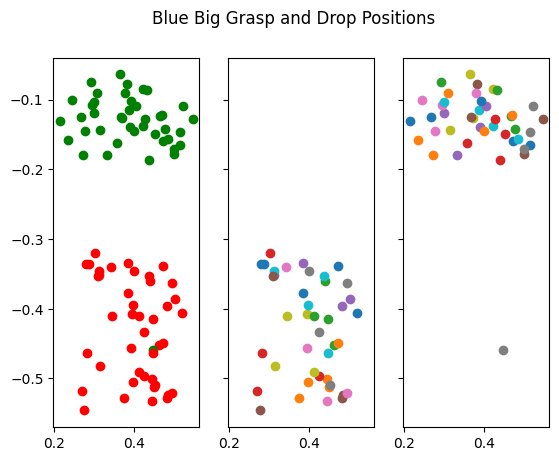

In [137]:
# Blue Big
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
ax0 = axs[0]
ax1 = axs[1]
ax2 = axs[2]
fig.suptitle("Blue Big Grasp and Drop Positions")

def plot_grasp_loc_2d(ax0, ax1, ax2, hand_traj, franka_traj):
    grad = np.gradient(np.linalg.norm(hand_traj, axis=1, ord=1))
    max_time = np.argmax(grad)
    min_time = np.argmin(grad)
    
    all_pos = franka_traj[:, :3]
    grasp_pos = all_pos[max_time, :]
    release_pos = all_pos[min_time, :]
    ax0.plot(grasp_pos[0], grasp_pos[1], color="red", marker='o')
    ax0.plot(release_pos[0], release_pos[1], color="green", marker='o')
    
    ax1.plot(grasp_pos[0], grasp_pos[1], marker='o')
    ax2.plot(release_pos[0], release_pos[1], marker='o')

for h, f in zip(td_blue_big.traj_data["qpos_hand"], td_blue_big.traj_data["qpos_franka"]):
    plot_grasp_loc_2d(ax0, ax1, ax2, h, f)

# ax1.set_xlim([-1, 1])
# ax1.set_ylim([-1, 1])
# ax2.set_xlim([-1, 1])
# ax2.set_ylim([-1, 1])

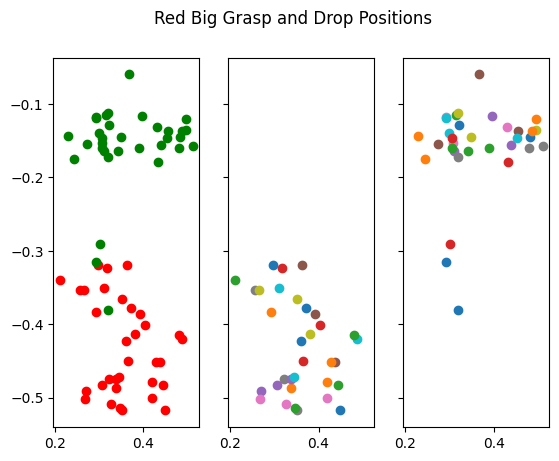

In [138]:
# Red Big
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
ax0 = axs[0]
ax1 = axs[1]
ax2 = axs[2]
fig.suptitle("Red Big Grasp and Drop Positions")

def plot_grasp_loc_2d(ax0, ax1, ax2, hand_traj, franka_traj):
    grad = np.gradient(np.linalg.norm(hand_traj, axis=1, ord=1))
    max_time = np.argmax(grad)
    min_time = np.argmin(grad)
    
    all_pos = franka_traj[:, :3]
    grasp_pos = all_pos[max_time, :]
    release_pos = all_pos[min_time, :]
    ax0.plot(grasp_pos[0], grasp_pos[1], color="red", marker='o')
    ax0.plot(release_pos[0], release_pos[1], color="green", marker='o')
    
    ax1.plot(grasp_pos[0], grasp_pos[1], marker='o')
    ax2.plot(release_pos[0], release_pos[1], marker='o')

for h, f in zip(td_red_big.traj_data["qpos_hand"], td_red_big.traj_data["qpos_franka"]):
    plot_grasp_loc_2d(ax0, ax1, ax2, h, f)

# ax1.set_xlim([-1, 1])
# ax1.set_ylim([-1, 1])
# ax2.set_xlim([-1, 1])
# ax2.set_ylim([-1, 1])

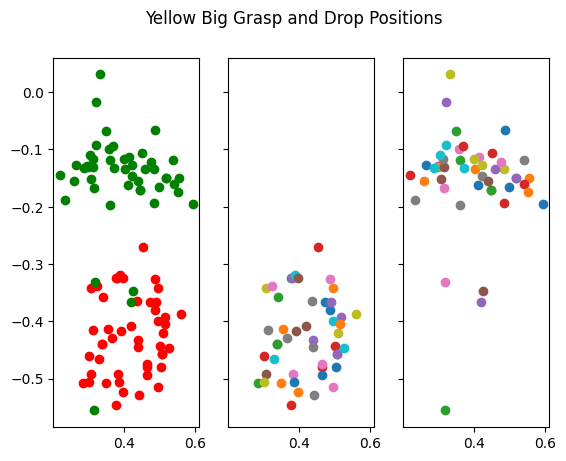

In [140]:
# Yellow Big
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
ax0 = axs[0]
ax1 = axs[1]
ax2 = axs[2]
fig.suptitle("Yellow Big Grasp and Drop Positions")

def plot_grasp_loc_2d(ax0, ax1, ax2, hand_traj, franka_traj):
    grad = np.gradient(np.linalg.norm(hand_traj, axis=1, ord=1))
    max_time = np.argmax(grad)
    min_time = np.argmin(grad)
    
    all_pos = franka_traj[:, :3]
    grasp_pos = all_pos[max_time, :]
    release_pos = all_pos[min_time, :]
    ax0.plot(grasp_pos[0], grasp_pos[1], color="red", marker='o')
    ax0.plot(release_pos[0], release_pos[1], color="green", marker='o')
    
    ax1.plot(grasp_pos[0], grasp_pos[1], marker='o')
    ax2.plot(release_pos[0], release_pos[1], marker='o')

for h, f in zip(td_yellow_big.traj_data["qpos_hand"], td_yellow_big.traj_data["qpos_franka"]):
    plot_grasp_loc_2d(ax0, ax1, ax2, h, f)

# ax1.set_xlim([-1, 1])
# ax1.set_ylim([-1, 1])
# ax2.set_xlim([-1, 1])
# ax2.set_ylim([-1, 1])